<a href="https://colab.research.google.com/github/TAUforPython/BaseControlTheory/blob/main/%D0%B1%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%B8%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%A2%D0%90%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Control Systems Library
https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.html

In [1]:
!pip install sympy

Передаточная функция и преобразование Лапласа

In [2]:
import sympy

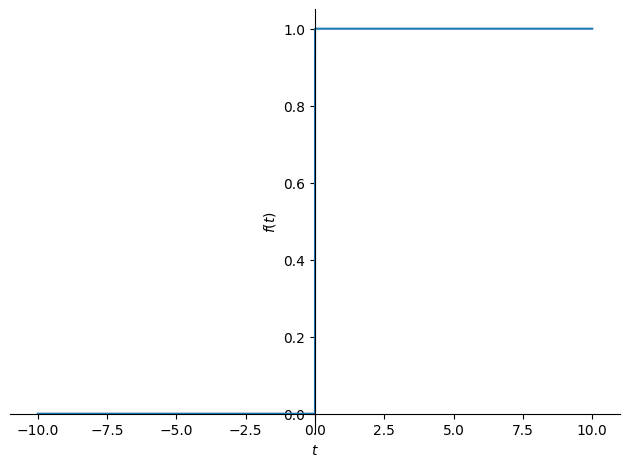

In [52]:
#пример ступенчатой функции
sympy.Heaviside(t)
sympy.plot(sympy.Heaviside(t))

In [49]:
# определяем функцию прямого и обратного преобразования Лапласа
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [28]:
t, s = sympy.symbols('t, s')
T = sympy.symbols('T', real=True, positive=True)
K = sympy.symbols('K', real=True, positive=True)
zeta = sympy.symbols('zeta', real=True, positive=True)

W = K/((T**2*s**2 + 2*zeta*T*s + 1))

In [29]:
invL(W)

K*exp(-t*zeta/T)*sin(t*sqrt(1 - zeta**2)/T)*Heaviside(t)/(T*sqrt(1 - zeta**2))

In [33]:
h = invL(W).subs({K: 1, T: 2, zeta:0.1})
print(h)

0.502518907629606*exp(-0.05*t)*sin(0.49749371855331*t)*Heaviside(t)


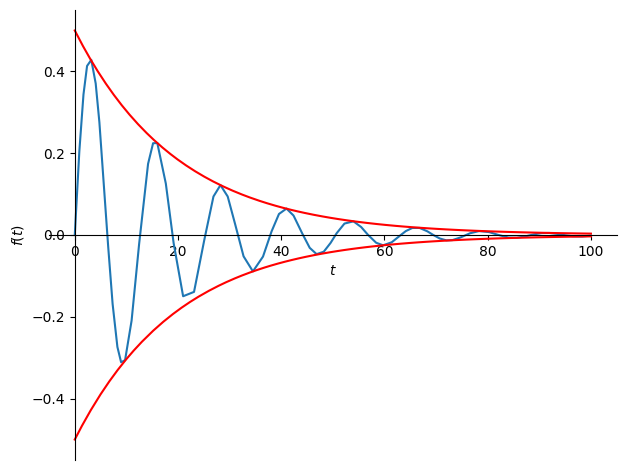

In [48]:
p = sympy.plot(h,0.5*exp(-0.05*t),-0.5*exp(-0.05*t),(t,0,100), show = False)
p[1].line_color = 'red'
p[2].line_color = 'red'
p.show()

In [12]:
from sympy import*
var('s a b')
var('t', positive = True)
a = 5
f = sin(3*t)
b = 7
q = exp(-7*t)
# Прямое преобразование a*L{f(t)}:
L1 = a * laplace_transform(f, t, s, noconds=True)
# Прямое преобразование b*L{q(t)}:
L2 = b * laplace_transform(q, t, s, noconds=True)
# Сумма a*L{f(t)}+b*L{q(t)}:

L = factor(L1 * L2)
print (L)

105/((s + 7)*(s**2 + 9))


105*(7*sin(3*t)/174 - cos(3*t)/58)*Heaviside(t) + 105*exp(-7*t)*Heaviside(t)/58


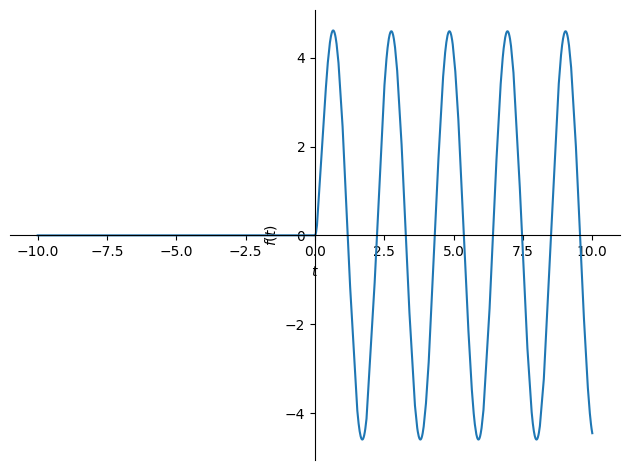

In [13]:
from sympy import*
#s, t = symbols('s, t')
s = symbols('s')
t = symbols('t', real = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)
inverse_laplace_transform(K/(T*s+1), s, t)
h = inverse_laplace_transform(L, s, t)
print(h)
sympy.plot(h)

In [ ]:
from sympy import *
s = symbols('s', complex=True, real=False)
t = symbols('t', real = True)
ksi = symbols('ksi', positive = True)
T = symbols('T', positive = True)
K = symbols('K', positive = True)

F = simplify((K * s**2)/(T * s**2 + 2*ksi*T*s + 1))
print(F)
t = symbols('t', real = True)
exp = inverse_laplace_transform(F, s, t)
print(exp)

F = 1 * s**2/(2 * s**2 + 2*0.1*3*s + 1)
print(F)
exp = inverse_laplace_transform(F, s, t)
print(exp)

F = apart(F)
print(F)
exp = inverse_laplace_transform(F, s, t)
print(exp)

K*s**2/(2*T*ksi*s + T*s**2 + 1)
K*((sqrt(T)*(2*ksi**2/T - 1/T**2)*exp(-ksi*t)*sin(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/sqrt(-T*ksi**2 + 1) - 2*ksi*exp(-ksi*t)*cos(t*sqrt(-T*ksi**2 + 1)/sqrt(T))/T)*Heaviside(t) + DiracDelta(t)/T)
s**2/(2*s**2 + 0.6*s + 1)
(-0.329226445408052*exp(-0.15*t)*sin(0.691013748054263*t) - 0.15*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)
-0.25*(0.6*s + 1.0)/(1.0*s**2 + 0.3*s + 0.5) + 0.5
-0.25*(1.31690578163221*exp(-0.15*t)*sin(0.691013748054263*t) + 0.6*exp(-0.15*t)*cos(0.691013748054263*t))*Heaviside(t) + 0.5*DiracDelta(t)


In [ ]:
# Обратное преобразование a* L^-1{f(t)}:
L_1 = a * inverse_laplace_transform(L1/a, s, t)
# Обратное преобразование b* L^-1{q(t)}
L_2 = b * inverse_laplace_transform(L2/b, s, t)
# a* L^-1{f(t)}+b* L^-1{q(t)}:
L_S = L_1 + L_2
print (L_S)
# Обратное преобразование L^-1{a*f(t)+b*q(t)}:
L_1_2 = inverse_laplace_transform(L1 + L2, s, t)
print (L_1_2)

7*exp(7*t)*Heaviside(t) + 5*sin(3*t)*Heaviside(t)
7*exp(7*t)*Heaviside(t) + 5*sin(3*t)*Heaviside(t)


In [ ]:
L_1

5*sin(3*t)

In [ ]:
pip freeze

In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np

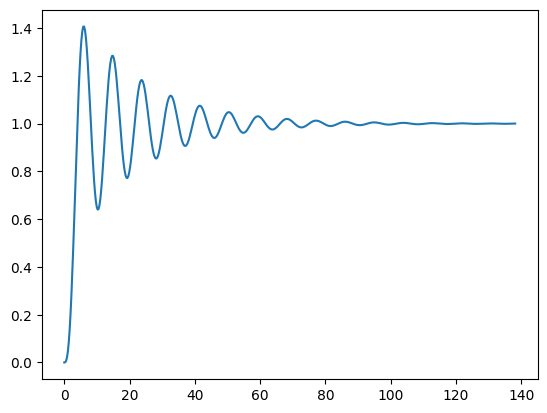

In [ ]:
W = control.tf([1],[2, 0.2, 1]) * control.tf([1],[2, 1])
t, y = control.step_response(W)
plt.plot(t, y)

In [ ]:
W

TransferFunction(array([1.]), array([4. , 2.4, 2.2, 1. ]))

In [ ]:
t = np.arange(0, 100, 0.5)
u = np.sin(1/2*np.pi*t)

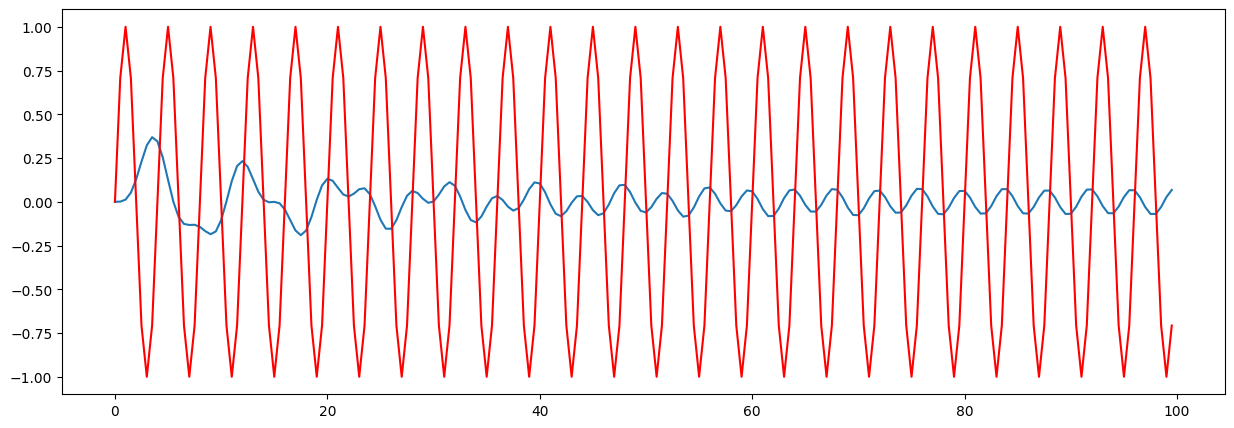

In [ ]:
t, y = control.forced_response(W, t, u)
plt.figure(figsize=(15,5))
plt.plot(t, y, label='y_0')
plt.plot(t,u, 'r')

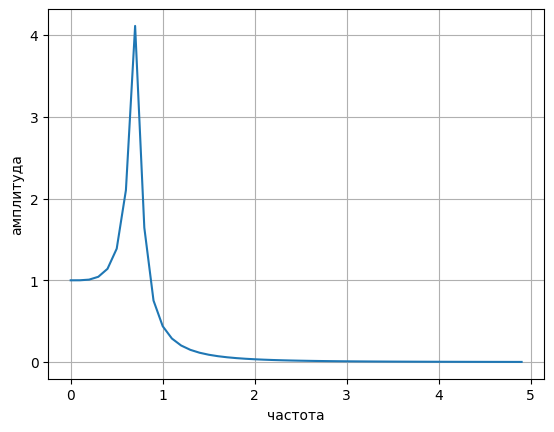

In [ ]:
x_omega = np.arange(0,5,0.1)
mag, phase, omega = control.freqresp(W, x_omega)
plt.plot(omega,mag)
plt.xlabel('частота')
plt.ylabel('амплитуда')
plt.grid()
plt.show()

In [ ]:
sysABCD = control.tf2ss(W)
sysABCD.A

array([[-0.6 , -0.55, -0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ]])

In [ ]:
Gc_o, T = control.observable_form(sysABCD)

In [ ]:
Gc_o

StateSpace(array([[-0.6 ,  1.  ,  0.  ],
       [-0.55,  0.  ,  1.  ],
       [-0.25,  0.  ,  0.  ]]), array([[0.  ],
       [0.  ],
       [0.25]]), array([[1., 0., 0.]]), array([[0.]]))

In [ ]:
Gc_r, T = control.reachable_form(sysABCD)

In [ ]:
Gc_r

StateSpace(array([[-0.6 , -0.55, -0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ]]), array([[1.],
       [0.],
       [0.]]), array([[0.  , 0.  , 0.25]]), array([[0.]]))

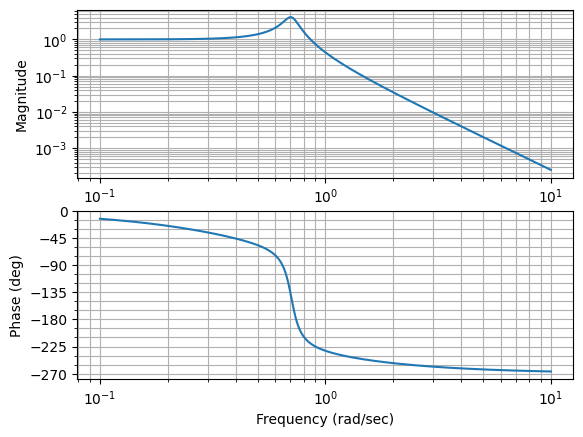

In [ ]:
plt.figure()
control.bode(sysABCD)
plt.show()

In [ ]:
control.pole(W)

array([-0.05+0.7053368j, -0.05-0.7053368j, -0.5 +0.j       ])

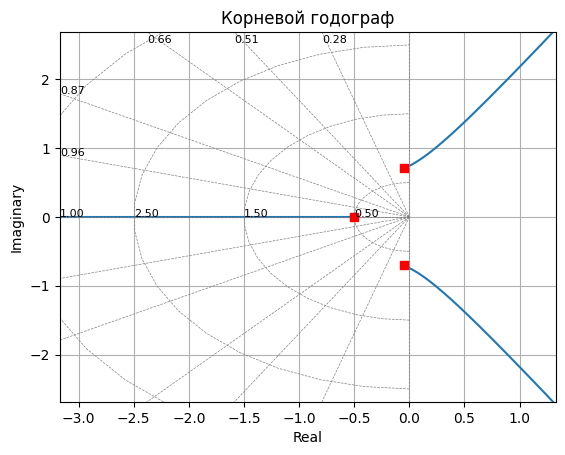

In [ ]:
plt.figure()
control.rlocus(W)
for pole in W.pole():
  plt.plot(np.real(pole), np.imag(pole), 'rs')
plt.title('Корневой годограф')
plt.grid()

In [ ]:
poles = [-0.1 + 2j, -0.1 - 2j, -0.2]
#poles = [-1, -0.5]

In [ ]:
K = control.acker(sysABCD.A, sysABCD.B, poles)
#K = control.place(sysABCD.A, sysABCD.B, poles)
Am = sysABCD.A - sysABCD.B * K
sysABCDm = control.ss(Am, sysABCD.B, sysABCD.C, sysABCD.D)
Wm = control.ss2tf(sysABCDm)
Wm

TransferFunction(array([-1.66533454e-16, -2.66453526e-15,  2.50000000e-01]), array([1.   , 0.4  , 4.05 , 0.802]))

In [ ]:
Am

array([[-0.4  , -4.05 , -0.802],
       [ 1.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ]])

In [ ]:
control.pole(Wm)

/usr/local/lib/python3.9/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


array([-0.1+2.j, -0.1-2.j, -0.2+0.j])

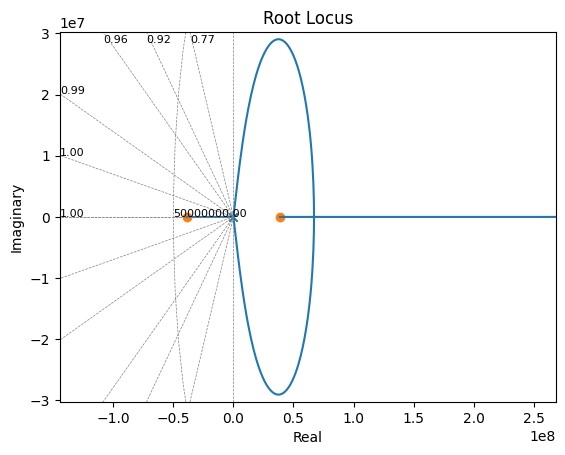

In [ ]:
rlist, klist = control.root_locus(Wm, print_gain = False)

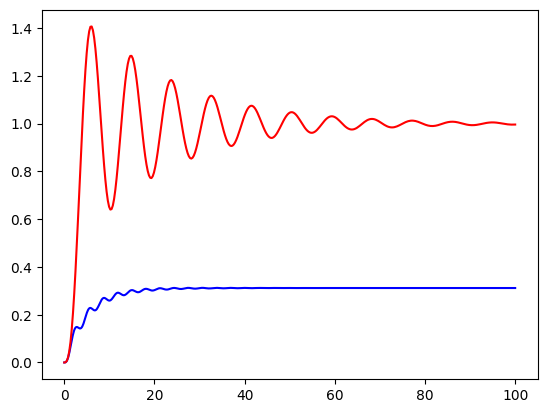

In [ ]:
t, y = control.step_response(Wm, 100)
plt.plot(t, y, 'b')

t, y = control.step_response(W, 100)
plt.plot(t, y, 'r')
plt.show()


In [ ]:
import numpy as np # библиотека для работы с массивами
import matplotlib.pyplot as plt # библиотека для системного управления

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import control.matlab as ctl # библиотека для построения графиков

Система управляема
Система наблюдаема


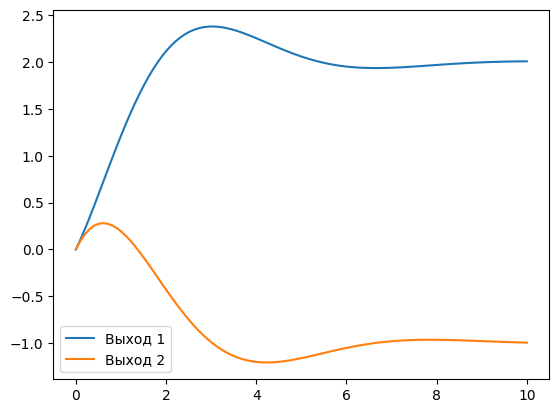

Система наблюдаема


In [ ]:


# определяем ABCD-матрицу системы (пример системы)
A = np.array([[0, 1], [-1, -1]]) # матрица A
B = np.array([[1, 0], [0, 1]]) # матрица B
C = np.array([[1, 0], [0, 1]]) # матрица C
D = np.zeros((2, 2)) # матрица D

# Создаем объект состояний sys на основе переданных ей матриц системы A, B, C и D.
# Используется для описания линейной системы в пространстве состояний и дальнейшего анализа системы на управляемость,
# наблюдаемость, стабильность и т.д.
sys = ctl.ss(A, B, C, D)

# проверяем управляемость системы
# Создаем матрицу управляемости системы.
# Матрица управляемости - это матрица, которая показывает, в какой степени каждое состояние системы может быть управляемо через входные переменные.
# Она вычисляется путем соединения матрицы управляемости и матрицы управляемости на каждом временном шаге.
# Функция ctl.ctrb принимает матрицу системы sys.A и матрицу входов sys.
# B в качестве аргументов и возвращает матрицу управляемости control_matrix.
control_matrix = ctl.ctrb(sys.A, sys.B)
# Вычисляем количество ненулевых неуправляемых состояний системы, используя матрицу управляемости control_matrix,
# которая была вычислена ранее, и матрицу состояний sys.A.
# Сначала мы вычисляем ранг матрицы управляемости с помощью функции np.linalg.matrix_rank(control_matrix).
# Ранг матрицы управляемости определяет количество независимых столбцов в матрице,
# которые могут быть управляемыми через входные переменные.
# Затем мы вычитаем ранг матрицы управляемости из общего количества состояний системы
# (полученного из размерности матрицы состояний sys.A) и получаем количество неуправляемых состояний.
# Это число сохраняется в переменной uncontrollable_states.
uncontrollable_states = sys.A.shape[0] - np.linalg.matrix_rank(control_matrix)
# проверяем, есть ли в системе ненулевые неуправляемые состояния.
# Если uncontrollable_states равно 0, значит все состояния системы могут быть управляемыми и система полностью управляема.
# Если uncontrollable_states больше 0, то это означает, что есть некоторые состояния системы,
# которые не могут быть управляемыми через входные переменные и система не является полностью управляемой.
if uncontrollable_states == 0:
    print("Система управляема")
else:
    print(f"Система неравновесна, {uncontrollable_states} состояний неравновесны")

# проверяем наблюдаемость системы
# вычисляем матрицу наблюдаемости для системы, используя матрицы состояний sys.A и матрицу выходов sys.C.
# Матрица наблюдаемости определяет, какие переменные состояния могут быть наблюдаемыми через выходные переменные системы.
# В частности, наблюдаемые состояния - это те, которые могут быть точно восстановлены из измерений выходов системы.
# Матрица наблюдаемости вычисляется с помощью функции ctl.obsv(sys.A, sys.C).
# Она использует матрицу состояний sys.A и матрицу выходов sys.C и вычисляет матрицу наблюдаемости observation_matrix.
observation_matrix = ctl.obsv(sys.A, sys.C)
# Вычисляем количество ненаблюдаемых состояний в системе.
# sys.A.shape[0] возвращает число строк матрицы состояний, то есть общее количество состояний в системе.
# np.linalg.matrix_rank(observation_matrix) возвращает ранг матрицы наблюдаемости observation_matrix.
# Ранг матрицы наблюдаемости равен количеству линейно независимых строк в этой матрице, то есть количеству наблюдаемых состояний.
# Вычитая количество наблюдаемых состояний из общего количества состояний,
# мы можем получить количество неузнаваемых состояний в системе.
unobservable_states = sys.A.shape[0] - np.linalg.matrix_rank(observation_matrix)
# Если unobservable_states равно 0, значит все состояния в системе являются наблюдаемыми и система полностью наблюдаема.
# Если unobservable_states больше 0, то это означает, что есть некоторые состояния системы,
# которые не могут быть наблюдаемыми через выходные переменные и система не является полностью наблюдаемой.
if unobservable_states == 0:
    print("Система наблюдаема")
else:
    print(f"Система неравновесна, {unobservable_states} состояний неравновесны")

# строим график реакции на ступенчатое воздействие
# задаем время для построения графика: создаем одномерный массив T из 100 равномерно расположенных точек на интервале от 0 до 10 включительно.
# Каждое значение в массиве представляет собой время, в течение которого будет происходить симуляция динамики системы.
T = np.linspace(0, 10, 100)
# задаем ступенчатое воздействие: создает матрицу U размера (len(T), 2), состоящую из единиц.
# Эта матрица представляет собой входное управляющее воздействие, которое будет подаваться на систему в течение времени T.
# В данном случае, так как система имеет два входа, U является матрицей размера (len(T), 2),
# где каждый столбец соответствует входному сигналу.
# Каждый элемент матрицы представляет собой амплитуду входного сигнала на соответствующий момент времени T.
# Здесь входной сигнал представлен двумя ступенчатыми функциями, которые имеют амплитуду 1 для всех моментов времени T.
U = np.ones((len(T), 2))
# выполняет симуляцию динамики системы во времени, используя входное управляющее воздействие U и время T.
# Функция lsim из библиотеки control используется для численного решения дифференциального уравнения,
# описывающего динамику системы, заданной матрицами A, B, C и D.
# В этой строке переменная sys представляет собой систему, заданную матрицами A, B, C и D, которую мы определили ранее.
# Результатом выполнения lsim являются выходные данные Y и время T, а также неиспользуемый объект _, который мы игнорируем.
# Переменная Y содержит выходной сигнал системы, который представляет собой матрицу размера (len(T), 2),
# где каждый столбец соответствует выходному сигналу, а каждая строка соответствует моменту времени T.
Y, T, _ = ctl.lsim(sys, U, T)

# строим график реакции на ступенчатое воздействие
plt.plot(T, Y[:, 0], label="Выход 1")
plt.plot(T, Y[:, 1], label="Выход 2")
plt.legend()
plt.show()

# решаем задачу с ненаблюдаемой системой
A_n = np.array([[0, 1], [0, -1]])
B_n = np.array([[1, 0], [0, 1]])
C_n = np.array([[1, 0], [0, 1]])
D_n = np.zeros((2, 2))
sys_n = ctl.ss(A_n, B_n, C_n, D_n)
observation_matrix_n = ctl.obsv(sys_n.A, sys_n.C)
unobservable_states_n = sys_n.A.shape[0] - np.linalg.matrix_rank(observation_matrix_n)
if unobservable_states_n == 0:
    print("Система наблюдаема")
else:
    print(f"Система ненаблюдаема, {unobservable_states_n} состояний неблюдаемы")
